In [4]:
from deepCR import deepCR
from astropy.io import fits

In [16]:
from deepCR import deepCR
from astropy.io import fits
image = fits.getdata("/Users/wasi/Downloads/ietx1ab1q_flc.fits")[:612,:612]

# Create an instance of deepCR for ACS-WFC
mdl = deepCR(mask="ACS-WFC")
# mdl = deepCR(mask="WFC3-UVIS") for WFC3-UVIS

# Apply the model
mask = mdl.clean(image, threshold = 0.5)
# 0.5 threshold usually works for ACS/WFC
# 0.1-0.2 for WFC3/UVIS (see Chen et al. 2024)

# Probabilistic mask could be helpful in determining threshold
prob_mask = mdl.clean(image, binary=False)

# Optional inpainting with median filtering
mask, cleaned_image = mdl.clean(image, threshold = 0.5, inpaint=True)

/opt/anaconda3/envs/hons/lib/python3.11/site-packages/deepCR/model.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.maskNet.load_state_dict(torch.load(mask_path, ma

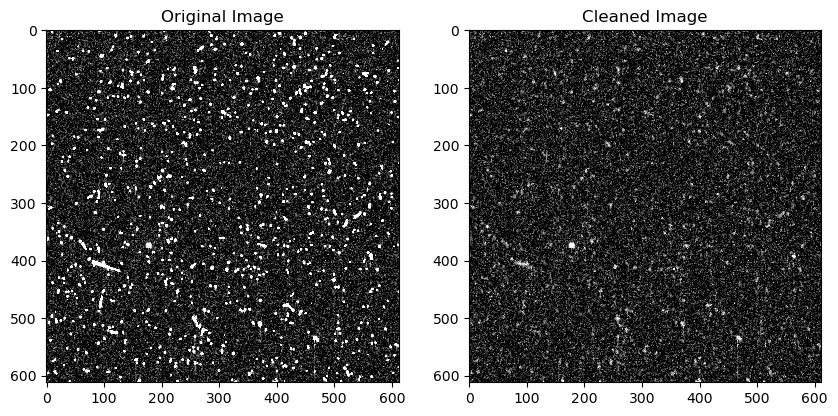

In [17]:
# print cleaned image

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, vmin=-0.5, vmax=10, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(cleaned_image, vmin=-0.5, vmax=10, cmap='gray')
plt.title('Cleaned Image')
plt.show()


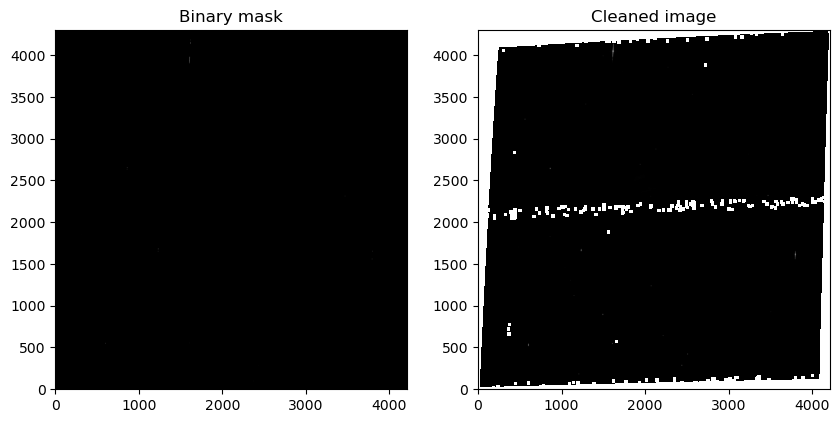

In [7]:
# view the binary mask and cleaned image
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(binary_mask, origin='lower', cmap='gray')
plt.title('Binary mask')
plt.subplot(122)
plt.imshow(cleaned_image, origin='lower', cmap='gray')
plt.title('Cleaned image')
plt.show()
